In [158]:
import numpy as np
import pandas as pd
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [159]:
df = pd.read_csv('merged.csv')
type(df)

pandas.core.frame.DataFrame

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  8823 non-null   int64  
 1   user_id                     8823 non-null   int64  
 2   visited                     8823 non-null   float64
 3   active                      8823 non-null   int64  
 4   creation_time               8823 non-null   object 
 5   name                        8823 non-null   object 
 6   email                       8823 non-null   object 
 7   creation_source             8823 non-null   object 
 8   last_session_creation_time  8823 non-null   float64
 9   opted_in_to_mailing_list    8823 non-null   int64  
 10  enabled_for_marketing_drip  8823 non-null   int64  
 11  org_id                      8823 non-null   int64  
 12  invited_by_user_id          4776 non-null   float64
dtypes: float64(3), int64(6), object(4

## Data Cleaning & EDA

In [161]:
df.isna().sum()

Unnamed: 0                       0
user_id                          0
visited                          0
active                           0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
dtype: int64

In [162]:
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/ 
#create a column, 1 if invited by another user 0 if not
# do the same for org_id

df['invited_by_user'] = np.where(df['invited_by_user_id']>= 1, 1, 0)

df['belong_to_org'] = np.where(df['org_id']>= 1, 1, 0)

In [163]:
# drop columns that are not useful for modeling, datetime columns, or redundant columns like 'visited'

df = df.drop(['invited_by_user_id','last_session_creation_time','creation_time', 'user_id', 'name', 'email', 'visited', 'Unnamed: 0', 'org_id'],axis =1)

In [164]:
# rename 'active' column to 'adopted_user'
df = df.rename(columns = {'active': 'adopted_user'})

In [165]:
#check for duplicated rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,adopted_user,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user,belong_to_org
4,1,GUEST_INVITE,0,0,1,1
5,1,GUEST_INVITE,0,0,1,1
9,1,ORG_INVITE,0,0,1,1
13,1,SIGNUP,0,0,0,1
15,1,ORG_INVITE,0,0,1,1
...,...,...,...,...,...,...
8818,1,ORG_INVITE,0,0,1,1
8819,1,SIGNUP_GOOGLE_AUTH,0,0,0,1
8820,1,GUEST_INVITE,1,1,1,1
8821,1,PERSONAL_PROJECTS,0,0,0,1


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   adopted_user                8823 non-null   int64 
 1   creation_source             8823 non-null   object
 2   opted_in_to_mailing_list    8823 non-null   int64 
 3   enabled_for_marketing_drip  8823 non-null   int64 
 4   invited_by_user             8823 non-null   int32 
 5   belong_to_org               8823 non-null   int32 
dtypes: int32(2), int64(3), object(1)
memory usage: 344.8+ KB


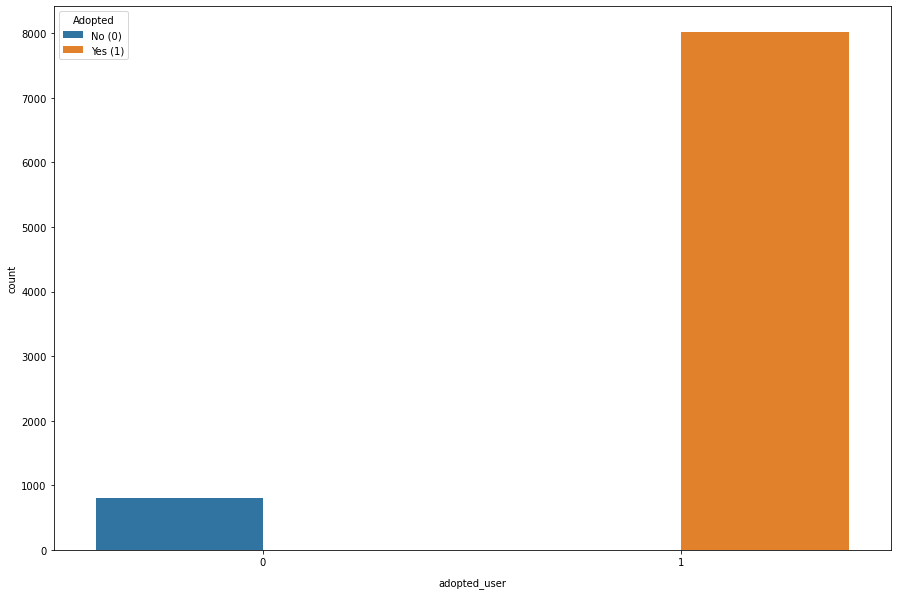

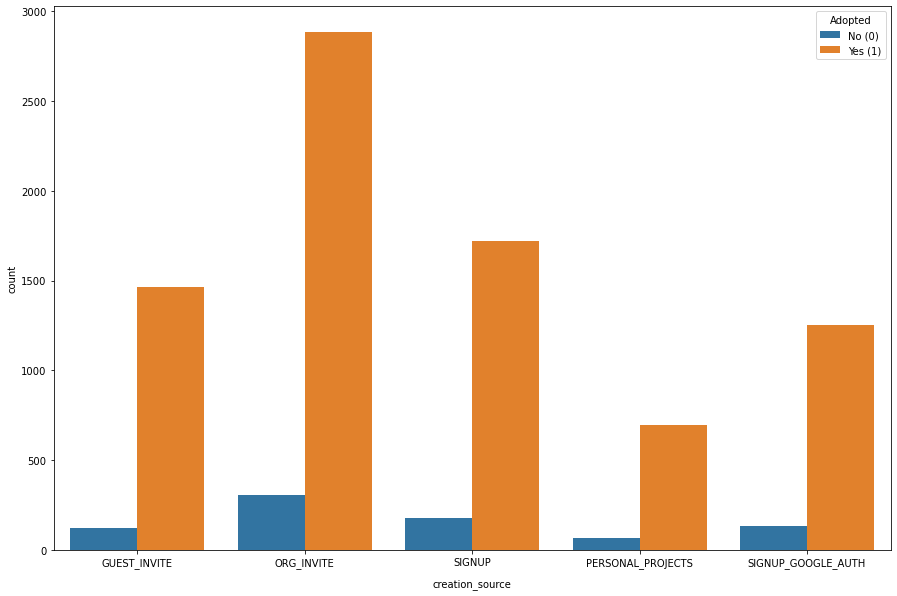

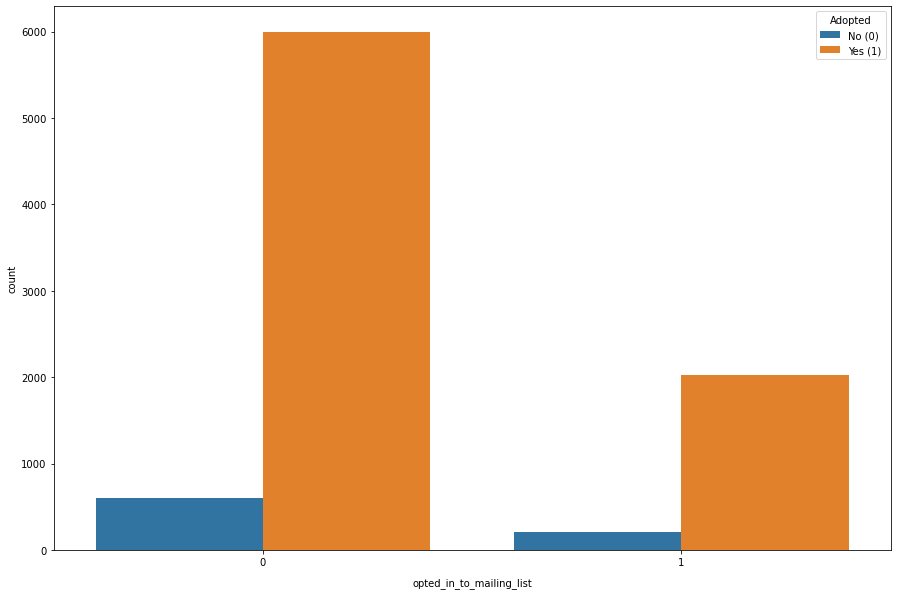

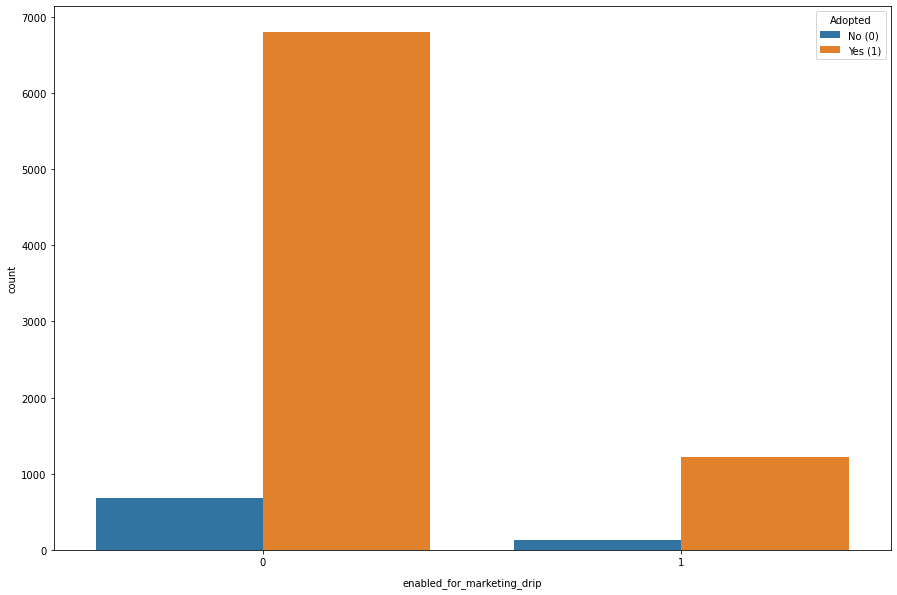

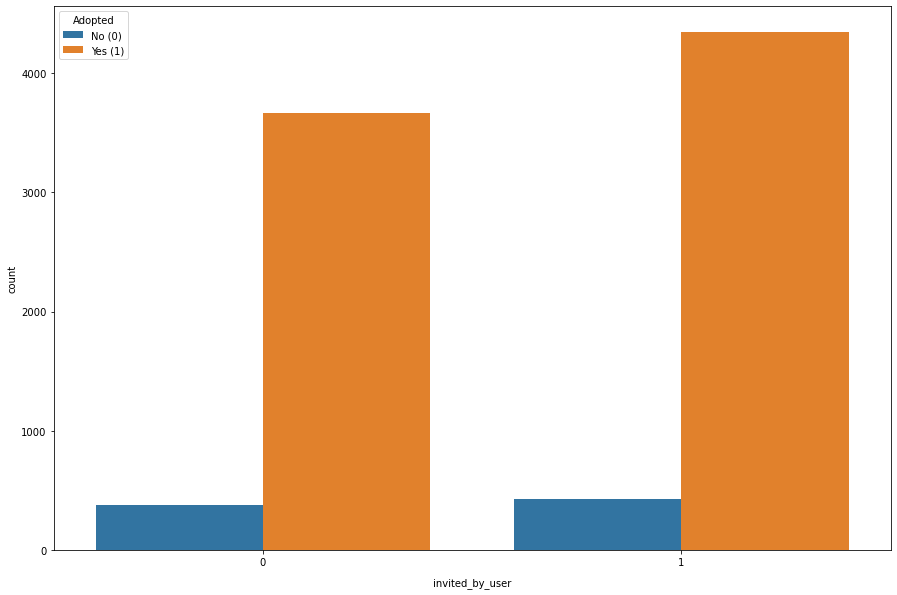

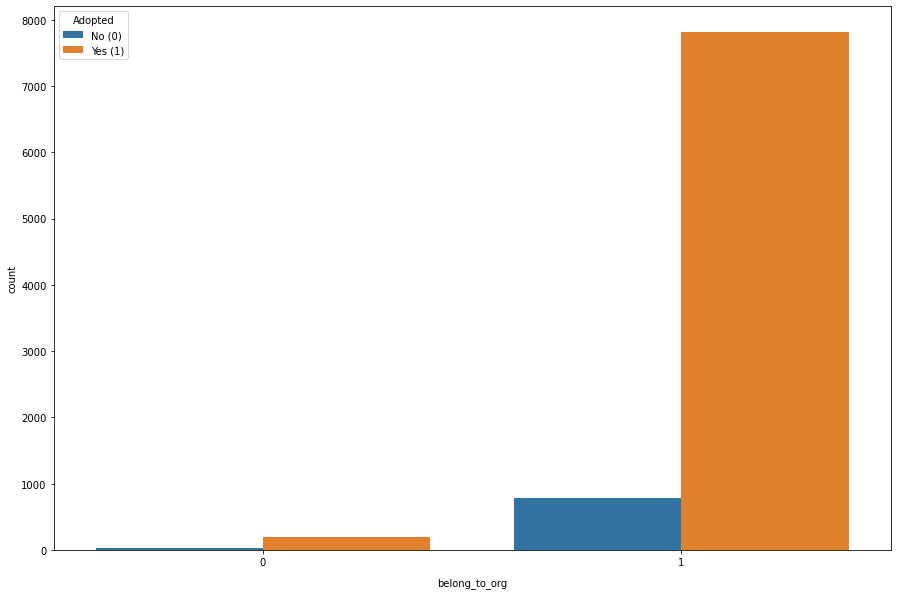

In [168]:
# credit to (https://towardsdatascience.com/how-machine-learning-can-help-with-customer-retention-6b5bf654e822)

feature = ['adopted_user','creation_source', 'opted_in_to_mailing_list','enabled_for_marketing_drip', 'invited_by_user', 'belong_to_org']

for i in feature:
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    ax1 = sns.countplot(x = df[i], hue='adopted_user',  data=df)
    ax1.set_xlabel(feature, labelpad=10)
    ax1.set_xlabel(i, labelpad=10)
    ax1.legend(title='Adopted', labels= ['No (0)', 'Yes (1)'])
 

In [169]:
adopted_counts = df.adopted_user.value_counts()
print(f"The percentage of adopted users in this data set is {adopted_counts[1]/(adopted_counts[0] + adopted_counts[1])}")

The percentage of adopted users in this data set is 0.9084211719369829


## Feature Correlation & Encoding

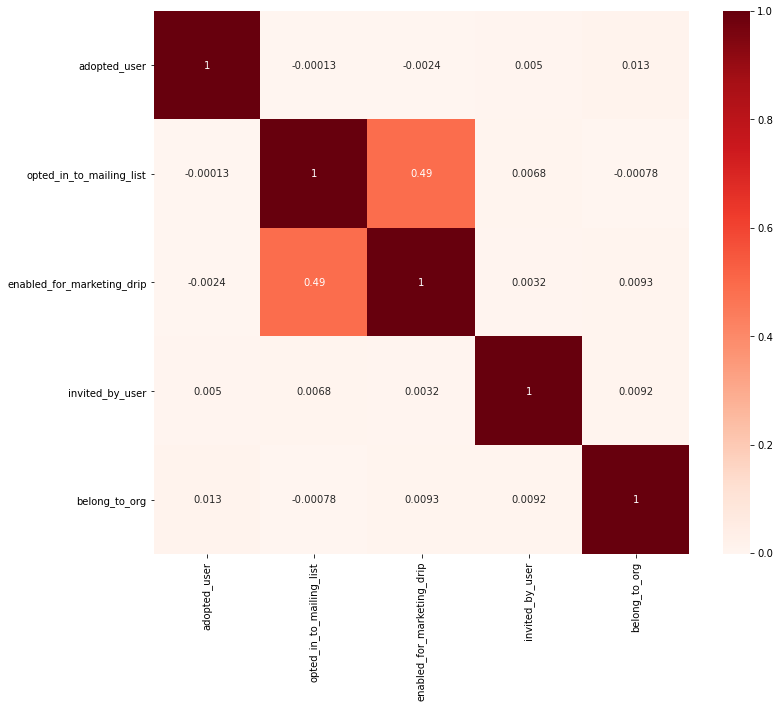

In [170]:
def correlation_heatmap(dataframe):
    """
    function that creates a heatmap showing the correlation of features
    """
    plt.figure(figsize=(12,10))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    
correlation_heatmap(df)

In [171]:
df

,adopted_user,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user,belong_to_org
0,0,GUEST_INVITE,1,0,1,1
1,1,ORG_INVITE,0,0,1,1
2,0,ORG_INVITE,0,0,1,1
3,1,GUEST_INVITE,0,0,1,1
4,1,GUEST_INVITE,0,0,1,1
...,...,...,...,...,...,...
8818,1,ORG_INVITE,0,0,1,1
8819,1,SIGNUP_GOOGLE_AUTH,0,0,0,1
8820,1,GUEST_INVITE,1,1,1,1
8821,1,PERSONAL_PROJECTS,0,0,0,1


In [172]:
# creation_source column needs to be encoded, get dummies creates a new variable for each type of invitation
dummies = pd.get_dummies(df)
dummies

,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user,belong_to_org,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,0,1,0,1,1,1,0,0,0,0
1,1,0,0,1,1,0,1,0,0,0
2,0,0,0,1,1,0,1,0,0,0
3,1,0,0,1,1,1,0,0,0,0
4,1,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8818,1,0,0,1,1,0,1,0,0,0
8819,1,0,0,0,1,0,0,0,0,1
8820,1,1,1,1,1,1,0,0,0,0
8821,1,0,0,0,1,0,0,1,0,0


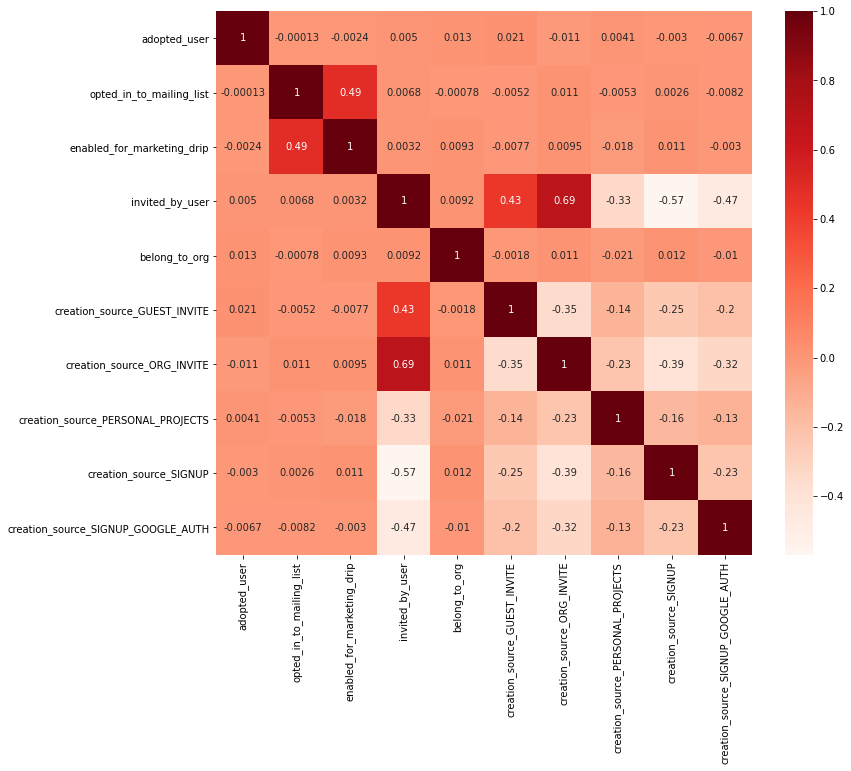

In [173]:
#show the correlation of features after encoding
correlation_heatmap(dummies)

## Modeling

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance


In [191]:
#define X and y variables, make sure to drop adopted_users from the dataframe
X = dummies.drop('adopted_user', axis=1)
y = dummies['adopted_user']

In [192]:
#set up variables for pipeline
rand_forest = ['random_forest', RandomForestClassifier]

In [193]:
#https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

def classification_model(model_name):
    
    #split the data into training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22, stratify=y)
    
    #create a pipeline that scales the data
    #model_name[0] and [1] are based on rand_forest variable
    pipe = Pipeline([('scaler', StandardScaler()), (model_name[0], model_name[1]())])
    
    #fit the model using the training data
    pipe.fit(X_train, y_train)
    
    #y value predictions based on the X_test sample
    y_pred = pipe.predict(X_test)
    
    # two different ways to print the accuracy of the model & ROC Curve 
    print(pipe.score(X_test, y_test))
    print(accuracy_score(y_test, y_pred))
    
    
    
    #credit (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
    plot_roc_curve(pipe, X_test, y_test)
    
    feature_names = ['opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'invited_by_user', 'belong_to_org',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH']
    
    #pull out RandomForestClassifier() from the pipeline
    forest = pipe.steps[1][1]
    
    #start_time = time.time()
    importances = forest.feature_importances_
    
    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.barh(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_xlabel("Mean decrease in impurity")


0.9071347678369196
0.9071347678369196


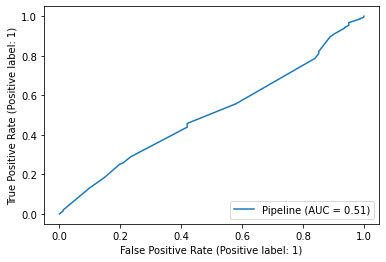

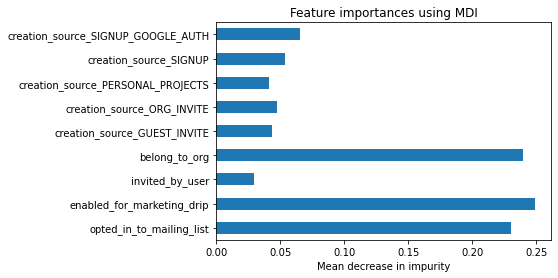

In [194]:
classification_model(rand_forest)

In [179]:
# https://www.r-bloggers.com/2019/03/what-it-the-interpretation-of-the-diagonal-for-a-roc-curve/
# explanation of diagonal ROC curves and why they can occur

## Bonus Modeling: Feature transformations with ensembles of trees

The following is a great example of how this project could be improved. Credit goes to Tim Head betatim@gmail.com.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html

In [180]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=8823, random_state=10)

X_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=10)
X_train_ensemble, X_train_linear, y_train_ensemble, y_train_linear = \
    train_test_split(X_full_train, y_full_train, test_size=0.5,
                     random_state=10)

In [181]:
n_estimators = 100
max_depth = 3

In [182]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10)
random_forest.fit(X_train_ensemble, y_train_ensemble)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10)
_ = gradient_boosting.fit(X_train_ensemble, y_train_ensemble)

In [183]:
from sklearn.ensemble import RandomTreesEmbedding

random_tree_embedding = RandomTreesEmbedding(
    n_estimators=n_estimators, max_depth=max_depth, random_state=0)

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_model = make_pipeline(
    random_tree_embedding, LogisticRegression(max_iter=1000))
rt_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('randomtreesembedding',
                 RandomTreesEmbedding(max_depth=3, random_state=0)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [185]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder


def rf_apply(X, model):
    return model.apply(X)


rf_leaves_yielder = FunctionTransformer(
    rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder, OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000))
rf_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function rf_apply at 0x000002BB91F17310>,
                                     kw_args={'model': RandomForestClassifier(max_depth=3,
                                                                              random_state=10)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [186]:
def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting})

gbdt_model = make_pipeline(
    gbdt_leaves_yielder, OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000))
gbdt_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x000002BB949F4940>,
                                     kw_args={'model': GradientBoostingClassifier(random_state=10)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

RT embedding -> LR 0.8916591115140526
RF 0.878286491387126
RF embedding -> LR 0.9111514052583862
GBDT 0.9381233000906618
GBDT embedding -> LR 0.9372166817769719


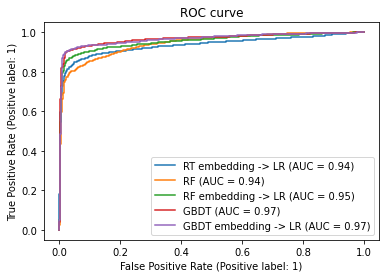

In [187]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

models = [
    ("RT embedding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBDT", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = plot_roc_curve(
        pipeline, X_test, y_test, ax=ax, name=name)
    print(name, pipeline.score(X_test, y_test))
    
_ = ax.set_title('ROC curve')
